<a href="https://colab.research.google.com/github/Solomon-Banuba/Python-Projects/blob/main/23f_data_analytics_final_project_Solomon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OKCupid Dating App Analaysis

Business Problem:
1. Demographic Insights: What are the most common body types, diets, and drinking or smoking preferences among users?
2. Profile Completeness and Engagement: How complete are user profiles on average, and does profile completeness correlate with user engagement (last online date)? Are therensections which are commonly left blank?
3. Correlation: Is there a correlation between any of the attributes?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/okcupid_profiles.csv')

df.info


<bound method DataFrame.info of        age     status sex orientation       body_type               diet  \
0       22     single   m    straight  a little extra  strictly anything   
1       35     single   m    straight         average       mostly other   
2       38  available   m    straight            thin           anything   
3       23     single   m    straight            thin         vegetarian   
4       29     single   m    straight        athletic                NaN   
...    ...        ...  ..         ...             ...                ...   
59941   59     single   f    straight             NaN                NaN   
59942   24     single   m    straight             fit    mostly anything   
59943   42     single   m    straight         average    mostly anything   
59944   27     single   m    straight        athletic    mostly anything   
59945   39     single   m         gay         average                NaN   

           drinks      drugs                          e

In [ ]:
df.dtypes

age              int64
status          object
sex             object
orientation     object
body_type       object
diet            object
drinks          object
drugs           object
education       object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
pets            object
religion        object
sign            object
smokes          object
speaks          object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
dtype: object

In [ ]:
df.isnull().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
religion       20226
sign           11056
smokes          5512
speaks            50
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
dtype: int64

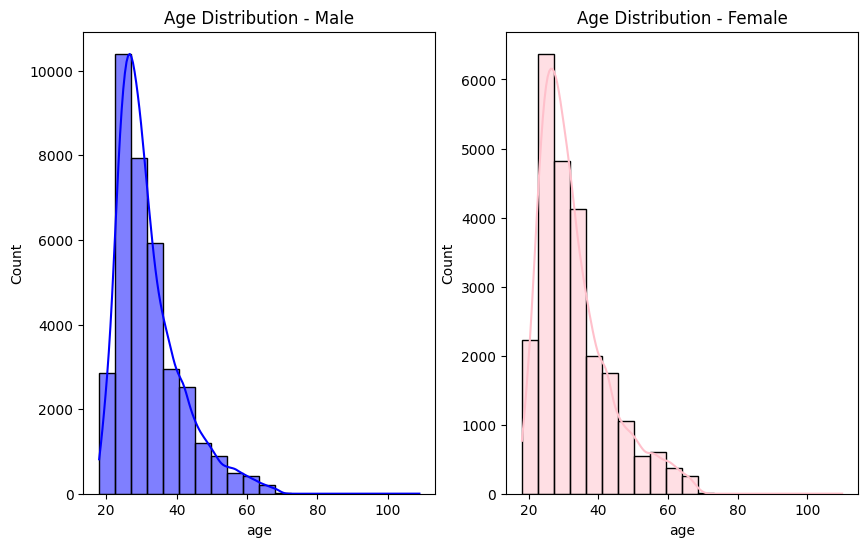

In [ ]:
#User's age distribution graph

plt.figure(figsize=(10, 6))

# Male user graph
plt.subplot(1, 2, 1)
sns.histplot(df[df['sex'] == 'm']['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution - Male')

# Female user graph
plt.subplot(1, 2, 2)
sns.histplot(df[df['sex'] == 'f']['age'], bins=20, kde=True, color='pink')
plt.title('Age Distribution - Female')

plt.show()

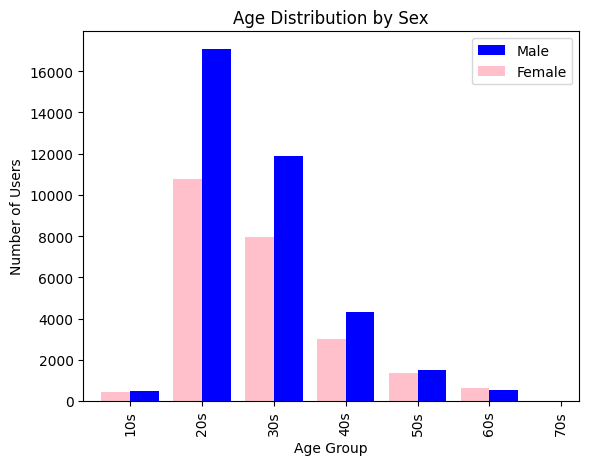

In [ ]:
#User's age distribution graph by age group


# Grouping age
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10s', '20s', '30s', '40s', '50s', '60s', '70s']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Graph
fig, ax = plt.subplots()
df[df['sex'] == 'm']['age_group'].value_counts().sort_index().plot(kind='bar', color='blue', position=0, width=0.4, ax=ax, label='Male')
df[df['sex'] == 'f']['age_group'].value_counts().sort_index().plot(kind='bar', color='pink', position=1, width=0.4, ax=ax, label='Female')

plt.title('Age Distribution by Sex')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')

plt.legend()

plt.show()

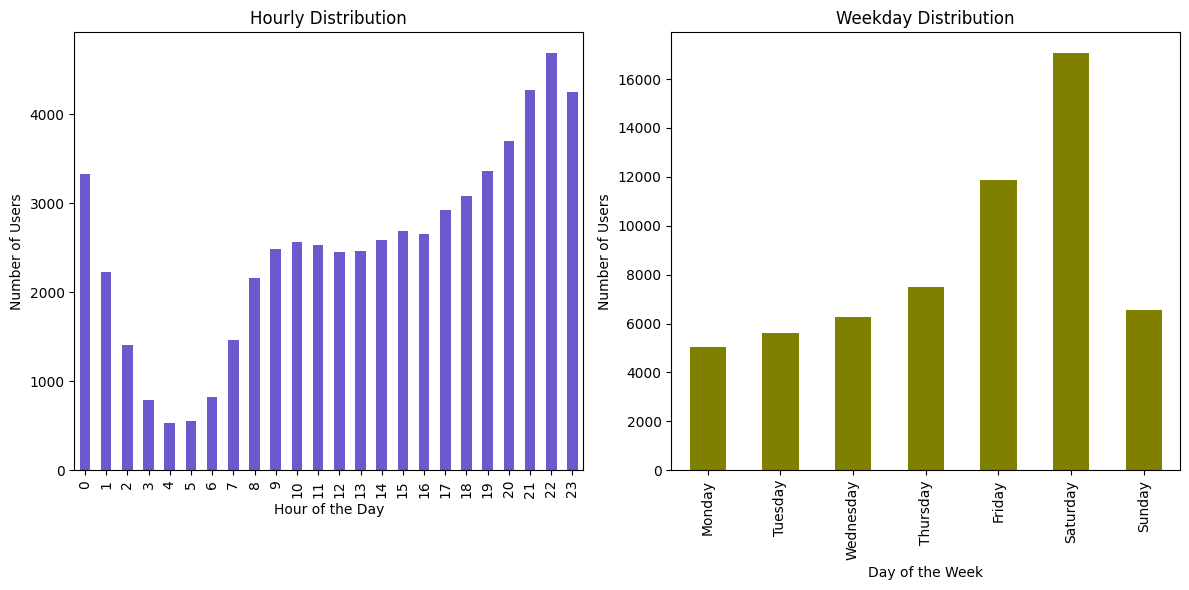

In [ ]:
# User distribution by time of day, day of week

df['last_online'] = pd.to_datetime(df['last_online'], format="%Y-%m-%d-%H-%M")

# Distribution by time
df['hour'] = df['last_online'].dt.hour
hourly_distribution = df['hour'].value_counts().sort_index()

# Distribution by day
df['weekday'] = df['last_online'].dt.day_name()
weekday_distribution = df['weekday'].value_counts()

# Graph: distribution by time
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
hourly_distribution.plot(kind='bar', color='slateblue')
plt.title('Hourly Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Users')

# Graph: distribution by day
plt.subplot(1, 2, 2)
weekday_distribution[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]].plot(kind='bar', color='olive')
plt.title('Weekday Distribution')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Users')


plt.tight_layout()
plt.show()

In [ ]:
#Check values of 'offspring' column
offspring_answer = df['offspring'].value_counts()
print(offspring_answer)

doesn't have kids                          7560
doesn't have kids, but might want them     3875
doesn't have kids, but wants them          3565
doesn't want kids                          2927
has kids                                   1883
has a kid                                  1881
doesn't have kids, and doesn't want any    1132
has kids, but doesn't want more             442
has a kid, but doesn't want more            275
has a kid, and might want more              231
wants kids                                  225
might want kids                             182
has kids, and might want more               115
has a kid, and wants more                    71
has kids, and wants more                     21
Name: offspring, dtype: int64


In [ ]:
# 'doesn't want kids', 'wants kids', and 'might want kids' don't tell us whether or not children exist, so I converted these values to 'no info'.
conditions = {
    "doesn't have kids": "doesn't have offspring",
    "doesn't have kids, but might want them": "doesn't have offspring",
    "doesn't have kids, but wants them": "doesn't have offspring",
    "doesn't have kids, and doesn't want any": "doesn't have offspring",
    "has a kid": "has offspring",
    "has kids": "has offspring",
    "has kids, but doesn't want more": "has offspring",
    "has a kid, but doesn't want more": "has offspring",
    "has a kid, and might want more": "has offspring",
    "has kids, and might want more": "has offspring",
    "has a kid, and wants more": "has offspring",
    "has kids, and wants more": "has offspring",
    "doesn't want kids": "no info",
    "wants kids": "no info",
    "might want kids": "no info",
    None: "no info"
}

df['offspring'] = df['offspring'].replace(conditions)

offspring_new_values = df['offspring'].value_counts()
print(offspring_new_values)


no info                   38895
doesn't have offspring    16132
has offspring              4919
Name: offspring, dtype: int64


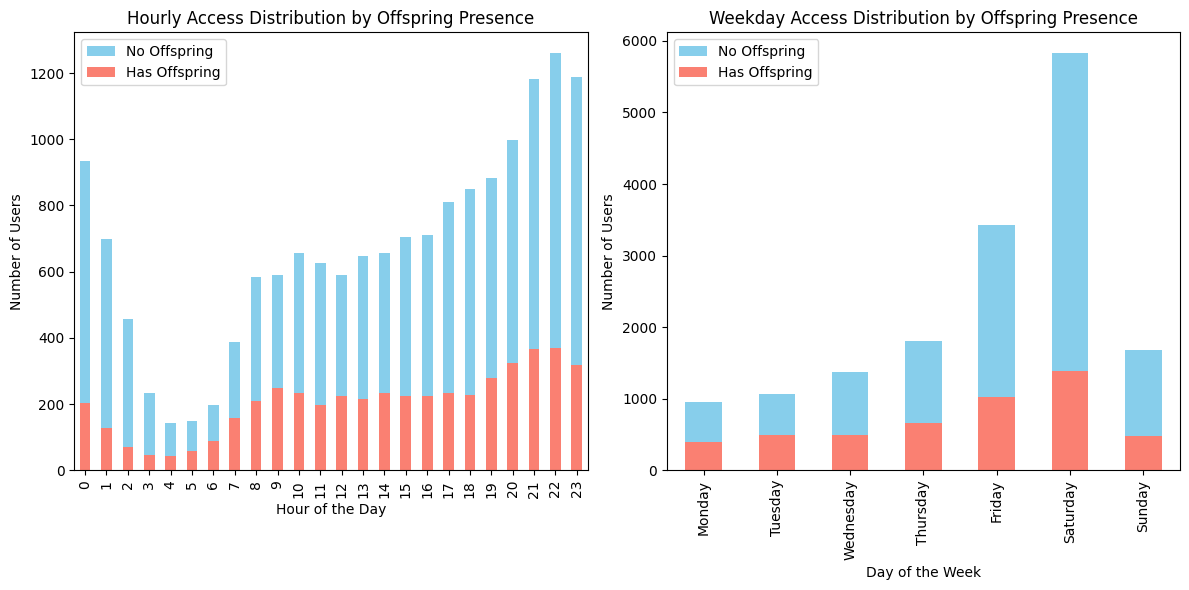

In [ ]:
# Filter df based on presence or absence of offspring
df_no_offspring = df[df['offspring']== "doesn't have offspring"]
df_has_offspring = df[df['offspring']== "has offspring"]

# Graph: distribution by time
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df_no_offspring['last_online'].dt.hour.value_counts().sort_index().plot(kind='bar', color='skyblue', label="No Offspring")
df_has_offspring['last_online'].dt.hour.value_counts().sort_index().plot(kind='bar', color='salmon', label="Has Offspring")
plt.title('Hourly Access Distribution by Offspring Presence')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Users')
plt.legend()

# Graph: distribution by day
plt.subplot(1, 2, 2)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_no_offspring['last_online'].dt.day_name().value_counts().loc[days_order].plot(kind='bar', color='skyblue', label="No Offspring")
df_has_offspring['last_online'].dt.day_name().value_counts().loc[days_order].plot(kind='bar', color='salmon', label="Has Offspring")
plt.title('Weekday Access Distribution by Offspring Presence')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Users')
plt.legend()


plt.tight_layout()
plt.show()


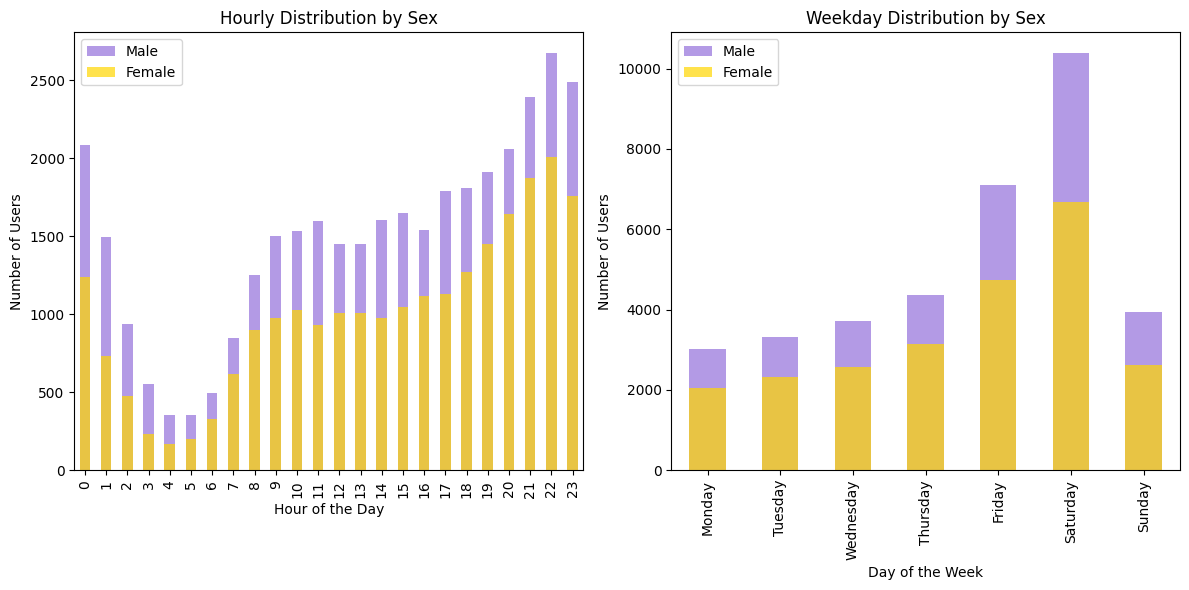

In [ ]:
# Filter df by sex
df_male = df[df['sex'] == 'm']
df_female = df[df['sex'] == 'f']

# Graph: distribution by time
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df_male['last_online'].dt.hour.value_counts().sort_index().plot(kind='bar', color='mediumpurple', alpha=0.7, label="Male")
df_female['last_online'].dt.hour.value_counts().sort_index().plot(kind='bar', color='gold', alpha=0.7, label="Female")
plt.title('Hourly Distribution by Sex')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Users')
plt.legend()

# Graph: distribution by day
plt.subplot(1, 2, 2)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_male['last_online'].dt.day_name().value_counts().loc[days_order].plot(kind='bar', color='mediumpurple', alpha=0.7, label="Male")
df_female['last_online'].dt.day_name().value_counts().loc[days_order].plot(kind='bar', color='gold', alpha=0.7, label="Female")
plt.title('Weekday Distribution by Sex')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Users')
plt.legend()


plt.tight_layout()
plt.show()


<ipython-input-12-15eb5e5d0ea5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profile_completeness'] = cal_percentage


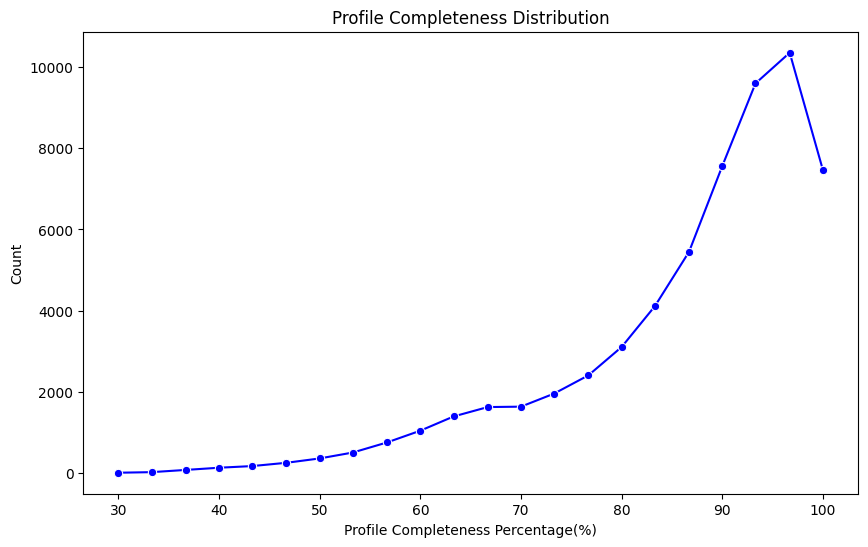

In [ ]:
# Move the 'last_online' column to the end of the dataframe
df = df[[col for col in df.columns if col != 'last_online'] + ['last_online']]

# Calculate profile completeness
target_col = 30
cal_percentage = (df.iloc[:, :target_col].notnull().mean(axis=1) * 100).round(1)

# Add new column
df['profile_completeness'] = cal_percentage

# Count value
value_counts = df['profile_completeness'].value_counts().sort_index()

# Graph
plt.figure(figsize=(10, 6))
sns.lineplot(x=value_counts.index, y=value_counts.values, marker='o', color='blue')

plt.title('Profile Completeness Distribution')
plt.xlabel('Profile Completeness Percentage(%)')
plt.ylabel('Count')


plt.show()

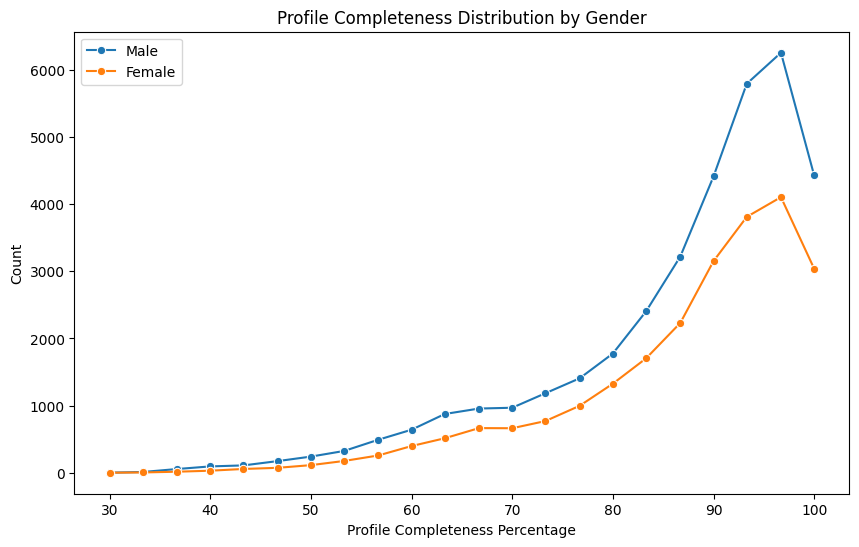

In [ ]:
# Filter df by gender
df_male = df[df['sex'] == 'm']
df_female = df[df['sex'] == 'f']

# Count profile competeness values by gender
cal_percentage_male = df_male['profile_completeness'].value_counts().sort_index().reset_index()
cal_percentage_female = df_female['profile_completeness'].value_counts().sort_index().reset_index()

# Graph
plt.figure(figsize=(10, 6))

sns.lineplot(x='index', y='profile_completeness', data=cal_percentage_male, marker='o', label='Male')
sns.lineplot(x='index', y='profile_completeness', data=cal_percentage_female, marker='o', label='Female')

plt.title('Profile Completeness Distribution by Gender')
plt.xlabel('Profile Completeness Percentage')
plt.ylabel('Count')
plt.legend()


plt.show()


In [ ]:
df.to_csv('okcupid_data_yujin.csv')

In [ ]:
cleaned = pd.read_csv('okcupid_data_yujin.csv')
cleaned.head()

,Unnamed: 0,age,status,sex,orientation,body_type,diet,drinks,drugs,education,...,essay5,essay6,essay7,essay8,essay9,age_group,hour,weekday,last_online,profile_completeness
0,0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,...,food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,20s,20,Thursday,2012-06-28 20:30:00,100.0
1,1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN,30s,21,Friday,2012-06-29 21:41:00,86.7
2,2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",30s,9,Wednesday,2012-06-27 09:10:00,83.3
3,3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,...,NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,20s,14,Thursday,2012-06-28 14:22:00,83.3
4,4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,...,NaN,NaN,NaN,NaN,NaN,20s,21,Wednesday,2012-06-27 21:26:00,76.7


In [ ]:
df.to_excel('okcupid_data_yujin.xlsx')